In [14]:
import os
import pandas as pd

# Directory containing the files
directory = '15percent'
suff = 'gin'

# Get a list of filenames in the directory
filenames = os.listdir(directory)

# Initialize an empty dictionary to store the data
data = {}

# Iterate over the filenames
for filename in filenames:
    if filename.endswith(f'.{suff}'):  # Ensure it's a .vis file
        # Extract dataset and algorithm names
        parts = filename.split('.')
        dataset_name = parts[0]
        algorithm_name = parts[2]  # Use parts[2] for algorithm name

        # Rename 'node2vec' to 'n2v' and 'ulocal_fair_ppr' to 'u-ppr'
        if algorithm_name == 'node2vec':
            algorithm_name = 'n2v'
        elif algorithm_name == 'ulocal_fair_ppr':
            algorithm_name = 'u-ppr'

        # Read the file and find the last non-zero number
        with open(os.path.join(directory, filename), 'r') as file:
            for line in reversed(file.readlines()):
                try:
                    last_number = float(line.strip().split()[-1])
                    if last_number != 0:
                        break
                except ValueError:
                    # Handle the case where conversion to float fails
                    continue

        # Store the data in the dictionary
        if algorithm_name not in data:
            data[algorithm_name] = {}
        data[algorithm_name][dataset_name] = last_number

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Order the rows and columns as specified
ordered_datasets = ['congress', 'email_eu', 'wiki_vote', 'facebook', 'lastfm', 'deezer']
ordered_algorithms = ['n2v', 'nodesim', 'fairwalk', 'u-ppr', 'crosswalk', 'minwalk']

df = df.reindex(index=ordered_datasets, columns=ordered_algorithms)

print(df)


                n2v   nodesim  fairwalk     u-ppr  crosswalk   minwalk
congress   0.197100  0.202138  0.180099  0.521205   0.187056  0.183494
email_eu   0.355446  0.386074  0.358741  0.524850   0.381367  0.346632
wiki_vote  0.588140  0.620323  0.600851  0.735045   0.583284  0.595802
facebook   0.463003  0.461894  0.463216  0.515765   0.436705  0.455226
lastfm     0.251242  0.267698  0.257401  0.623739   0.210977  0.228596
deezer     0.251465  0.262588  0.249978       NaN   0.231511  0.240303


C:\Users\Alex\AppData\Local\Temp\ipykernel_12772\113969367.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index, rotation=45, ha='right')
C:\Users\Alex\AppData\Local\Temp\ipykernel_12772\113969367.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index, rotation=45, ha='right')
C:\Users\Alex\AppData\Local\Temp\ipykernel_12772\113969367.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index, rotation=45, ha='right')
C:\Users\Alex\AppData\Local\Temp\ipykernel_12772\113969367.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index, rotation=45, ha='right')
C:\Users\Alex\AppData\Local\Temp\ipykernel_12772\113969367.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index, rotation=45, ha='right')
C:\Us

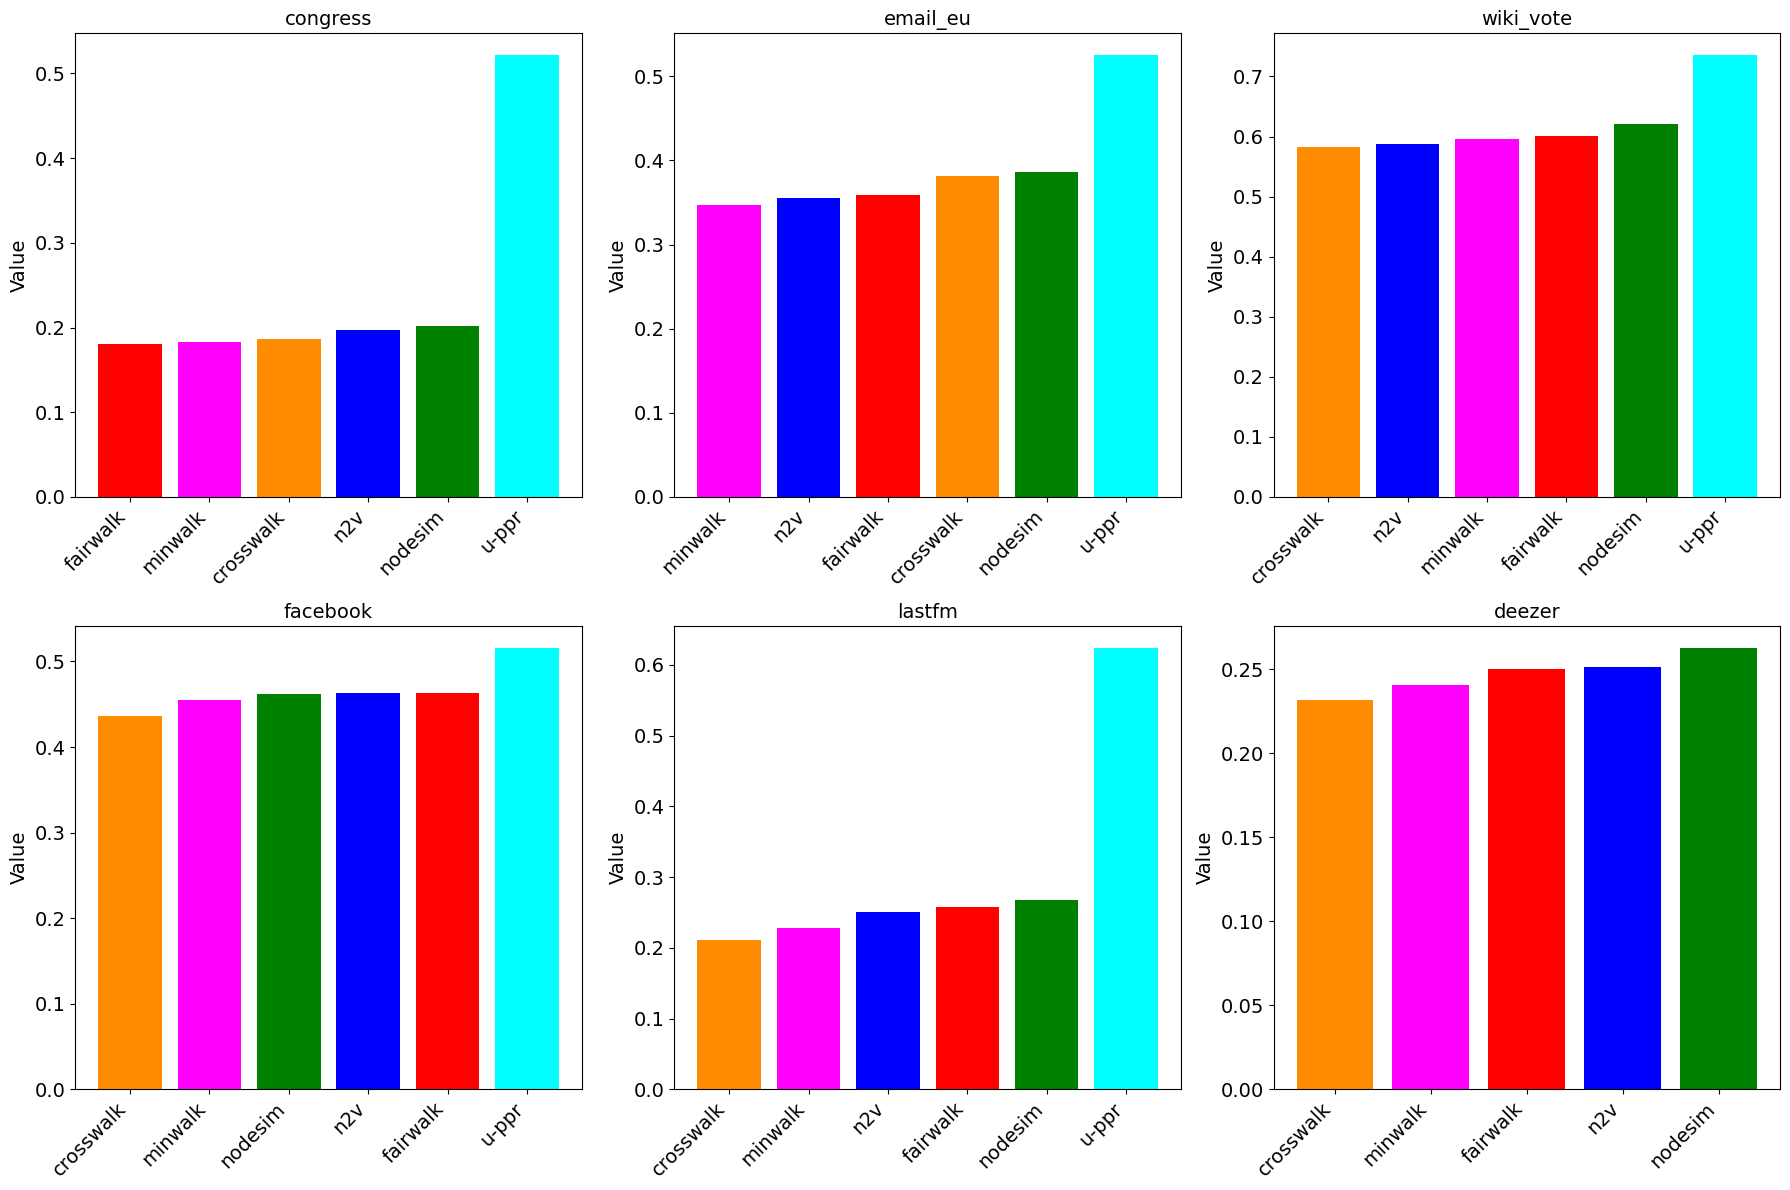

In [15]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
datasets = df.index
algorithms = df.columns

# Define colors for each algorithm
colors = {
    'n2v': 'blue', 'nodesim': 'green', 'fairwalk': 'red',
    'u-ppr': 'cyan', 'crosswalk': 'darkorange', 'minwalk': 'magenta'
}

# Create a 2x3 grid of subplots, possibly with a larger figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    ax = axes[i]
    # Drop NaN values and sort the bars by size
    data = df.loc[dataset].dropna().sort_values(ascending=True)
    bars = ax.bar(data.index, data.values, color=[colors[alg] for alg in data.index])

    ax.set_title(dataset, fontsize=14)
    # ax.set_xlabel('Algorithms', fontsize=14)
    ax.set_ylabel('Value', fontsize=14)

    # Rotate x-axis labels
    ax.set_xticklabels(data.index, rotation=45, ha='right')

    ax.tick_params(axis='both', labelsize=14)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the figure as a PDF
plt.savefig(f'bar_charts_{suff}.pdf', format='pdf')

# Show the plot
plt.show()
